# Structure

![Screenshot from 2023-06-18 10-45-28.png](<attachment:Screenshot from 2023-06-18 10-45-28.png>)

- The input layer has d features (in d "neurons" that are initialized manually in the first one)
  - In the FashionMNIST 784, it's also the number of columns of the weight matrix (or rows of the design matrix)
- Each neuron is connected to every neuron in the following layer 
- Each feature (neuron) has a weight vector that decides how important that feature is for the following one
  - eg for perceived quality maybe just price and material are important, so they will have higher weights
- Each **neuron holds and activation number** and has an activation vector as input (or features if we are in the first layer)
  - The output activation number is eg a ReLU on a linear combination of input features 

![Screenshot from 2023-06-18 12-29-08.png](<attachment:Screenshot from 2023-06-18 12-29-08.png>)
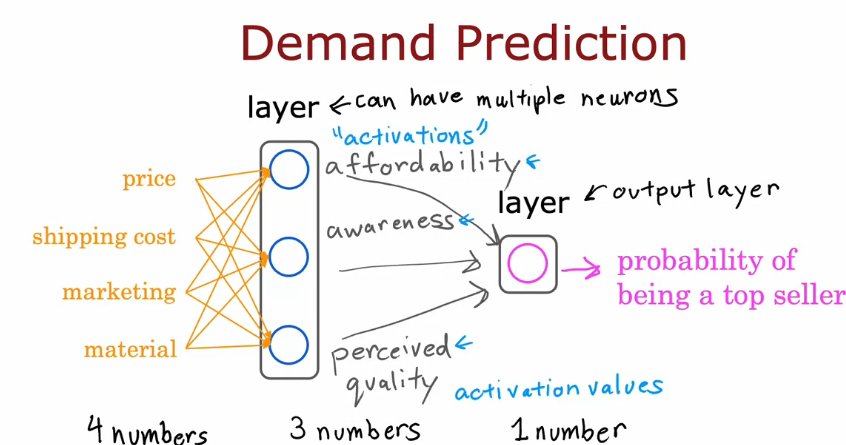
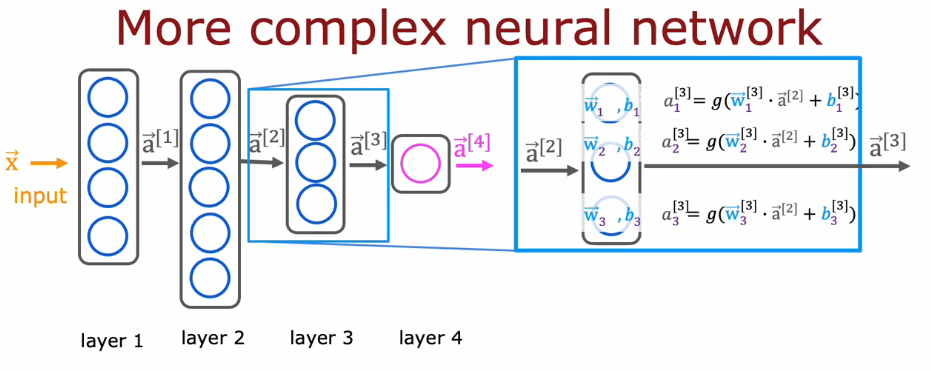

# Activation functions

- ReLU
- Sigmoid
- Linear (no activation)
- Softmax

**But why do we need them?**
- Because we just would have a linear function if we apply linear activations to linear functions
- We need nonlinearity to create nonlinear decision boundaries


# Inference (Forward Propagation)

## General idea
- We apply a nonlinearity (sigmoid, relu, tanh) to the linear of combination of input activations (features) and weights from the previous layer to compute every output activation
- The output of the last layer is our prediction
- Once we got the prediction, we can compute the loss - which changes with the chose activation function - wrt the real label
- From a practical perspective, we set **the weights of W for every neuron** such that, when a certain pattern presents itself, the weighted sum of activations will be the max possible, which means the net recognized the pattern

## Nomenclature
- $m$ # of examples
- $n^{[l]}$ # of hidden units of layer $l$ (output)
  - $n^{[0]} = inputdim = d_{in}$ #features of an example 
  - $n^{[L]} = outputdim = d_{out}$ #classes to predict


## Samples on columns
- $a^{[l]} = \sigma({W^{[l]}}a^{[l-1]} + b^{[l]})$
  - $a^{[l]} \in \mathbb{R}^{(n^{[l]},m)}$
  - $b^{[l]} \in \mathbb{R}^{(n^{[l]},1)}$
  - $W^{[l]} \in \mathbb{R}^{(n^{[l]},n^{[l-1]})}$
  - $a^{[0]} = X \in \mathbb{R}^{(d_{in},m)}$
- $i_{th}$ column of $a^{[l]}$ is prediction for example $i$ with $i = 0 \dots m-1$
  - Element $a^{[l]}[k,i]$ is how much the $k_{th}$ neuron of layer $l$ of $i_{th}$ sample is fired up
- $k_{th}$ row of $W^{[l]}$ is the connection from layer $l-1$ to the $k_{th}$ neuron of layer $l$
  - Element $W^{[l]}[k,j]$ is how much the $j_{th}$ neuron of layer $l-1$ influences the $k_{th}$ neuron of layer $l$

## Samples on rows
- $a^{[l]} = \sigma(a^{[l-1]}{W^{[l]}} + b^{[l]})$
  - $a^{[l]} \in \mathbb{R}^{(m,n^{[l]})}$
  - $b^{[l]} \in \mathbb{R}^{(1,n^{[l]})}$
  - $W^{[l]} \in \mathbb{R}^{(n^{[l-1]},n^{[l]})}$
  - $a^{[0]} = X \in \mathbb{R}^{(m,d_{in})}$
- $i_{th}$ row of $a^{[l]}$ is prediction for example $i$ with $i = 0 \dots m-1$
  - Element $a^{[l]}[i,k]$ is how much the $k_{th}$ neuron of layer $l$ of $i_{th}$ sample is fired up
- $k_{th}$ column of $W^{[l]}$ is the connection from layer $l-1$ to the $k_{th}$ neuron of layer $l$
  - Element $W^{[l]}[j,k]$ is how much the $j_{th}$ neuron of layer $l-1$ influences the $k_{th}$ neuron of layer $l$


# Optimization (Backward Propagation)

## Intuition on derivatives
- $ w \uparrow \epsilon $ (w increases of $\epsilon$) causes $J(w) \uparrow k\epsilon$ $\implies$ $\frac{\partial J}{\partial w} = k$
- Small derivative means small change in $w$
  - In fact in this case, changing $w$ doesn't change that much J

## Computational graph
- When we do a forward propagation, we have to compute the gradient in order to optimize
- That is achieved by doing backprop, which means unwinding the prediction by doing chained derivatives

![Screenshot from 2023-06-18 16-13-34.png](<attachment:Screenshot from 2023-06-18 16-13-34.png>)
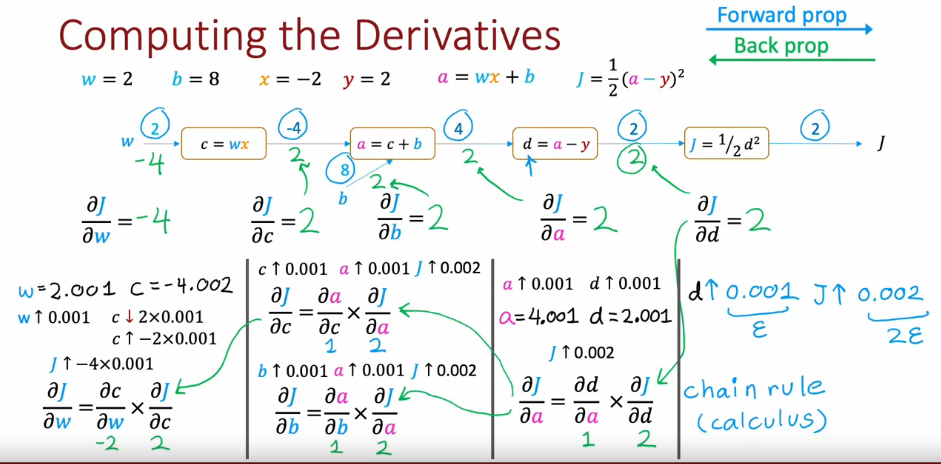

Accuracy: 0.875
Loss: 0.3669109046459198


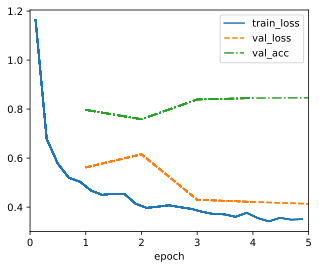

In [2]:
from toolbox.base_models import *
from toolbox.trainer import *
from toolbox.datamodule import FashionMNIST

model = MLPScratch(dimensions=[784,256,10], lr=0.1)
data = FashionMNIST(batch_size=64)
trainer = Trainer(max_epochs=5)
trainer.fit(model, data)

In [ ]:
from toolbox.base_models import *
from toolbox.trainer import *
from toolbox.datamodule import FashionMNIST

model = MLP(dimensions=[784,256,10], lr=0.1)
data = FashionMNIST(batch_size=20)
trainer = Trainer(max_epochs=5)
trainer.fit(model, data)